In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [37]:
df =pd.read_csv(
   "C:/Users/Alitte  Elizabath/Downloads/bank+marketing (1)/bank/bank.csv",sep=';'
)

print(df.head())
print(df.info())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

In [38]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



In [39]:
X = df.drop('y', axis=1)
y = df['y']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
y_pred = dt.predict(X_test)


In [43]:
accuracy_score(y_test, y_pred)


0.9005524861878453

In [44]:
confusion_matrix(y_test, y_pred)


array([[778,  29],
       [ 61,  37]])

In [45]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       807
           1       0.56      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.74      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905



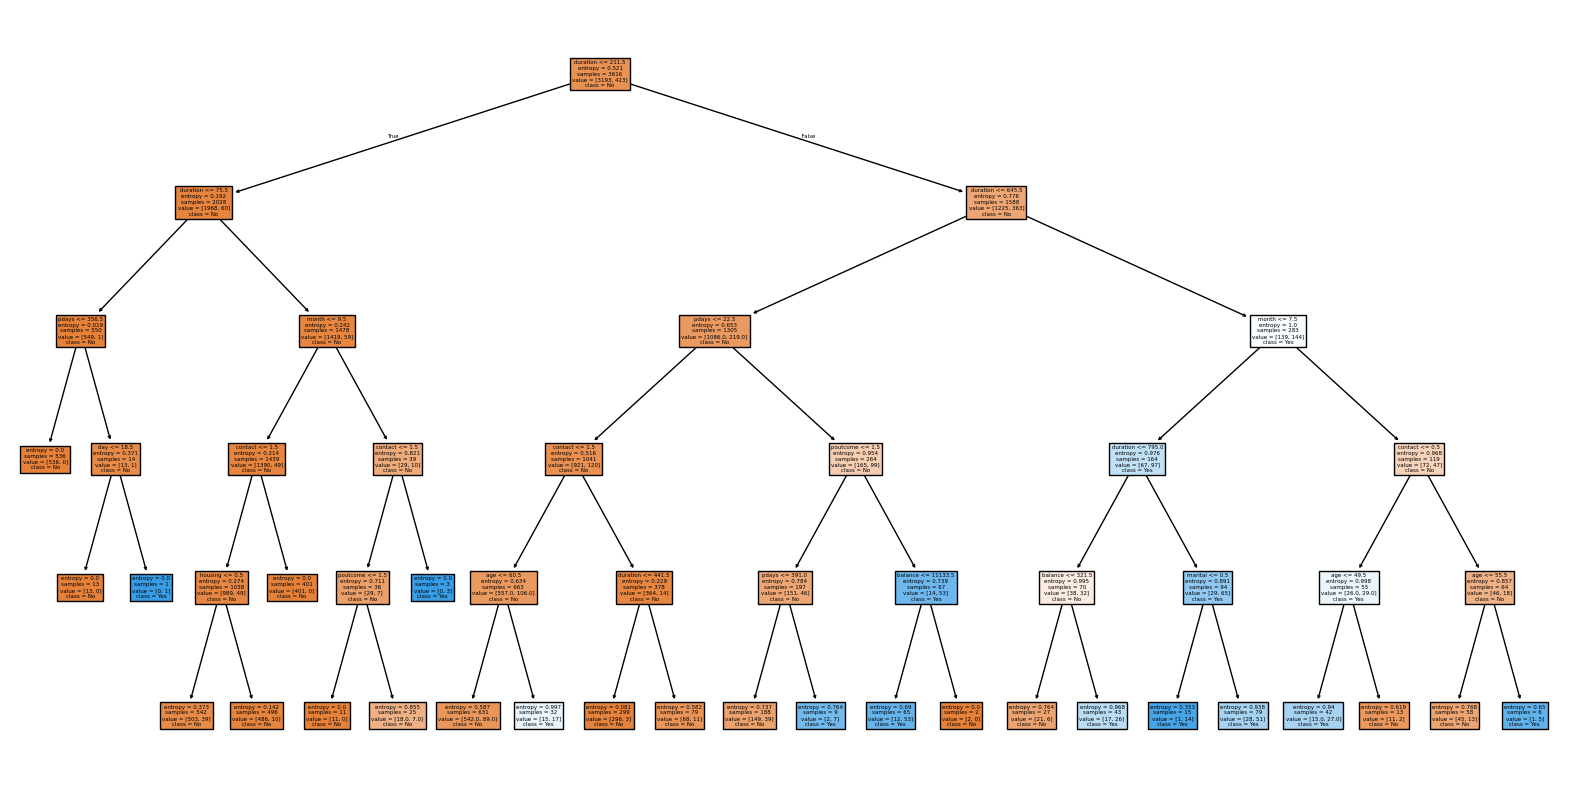

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)

plt.show()

